In [1]:
import numpy as np
import matplotlib.pyplot as plt
from methods_preparation import Methods

# Aquisição e tratamento dos dados

In [2]:
method = Methods()

data = method.import_df('winequalityN.csv')
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Neste projeto usaremos apenas o vinho branco, portanto iremos remover o vinho vermelho da nossa análise.

In [3]:
df_white = data.drop(data.index[data['type'] == 'red'])
df_white.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


O objetivo desse projeto é classificar se o vinho é bom ou não, com base na qualidade. Qualidades iguais ou inferiores a 5 representam vinhos ruins, maiores representam vinhos bons.
Dito isso, criaremos uma nova coluna caracterizando se o vinho é bom ou ruim.

In [4]:
df_white['opinion'] = df_white['quality'].apply(lambda x: 0 if x <= 5 else 1)
df_white = df_white.drop(columns=['quality'])
df_white = df_white.drop(columns=['type'])
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [5]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4890 non-null   float64
 1   volatile acidity      4891 non-null   float64
 2   citric acid           4896 non-null   float64
 3   residual sugar        4896 non-null   float64
 4   chlorides             4896 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4891 non-null   float64
 9   sulphates             4896 non-null   float64
 10  alcohol               4898 non-null   float64
 11  opinion               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Nota-se pouquissímos valores nulos, sinto-me livre para remove-los já que não tenho informção de como foi coletado estes dados.

In [6]:
df_white_final = df_white.dropna()

In [7]:
df_white_final.duplicated().value_counts()

False    3942
True      928
dtype: int64

Também há valores duplicados, e iremos remove-los

In [8]:
df_white_final = df_white_final.drop_duplicates().reset_index(drop=True)
df_white_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942 entries, 0 to 3941
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3942 non-null   float64
 1   volatile acidity      3942 non-null   float64
 2   citric acid           3942 non-null   float64
 3   residual sugar        3942 non-null   float64
 4   chlorides             3942 non-null   float64
 5   free sulfur dioxide   3942 non-null   float64
 6   total sulfur dioxide  3942 non-null   float64
 7   density               3942 non-null   float64
 8   pH                    3942 non-null   float64
 9   sulphates             3942 non-null   float64
 10  alcohol               3942 non-null   float64
 11  opinion               3942 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 369.7 KB


In [9]:
df_white_final.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
count,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000
mean,6.840297,0.280430,0.334490,5.918721,0.045887,34.918062,137.215753,0.993788,3.195287,0.490236,10.591945,0.659817
std,0.866067,0.103256,0.122404,4.861389,0.023088,17.227540,43.128509,0.002907,0.151345,0.113653,1.217787,0.473831
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991600,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,1.000000
75%,7.300000,0.328750,0.390000,8.875000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


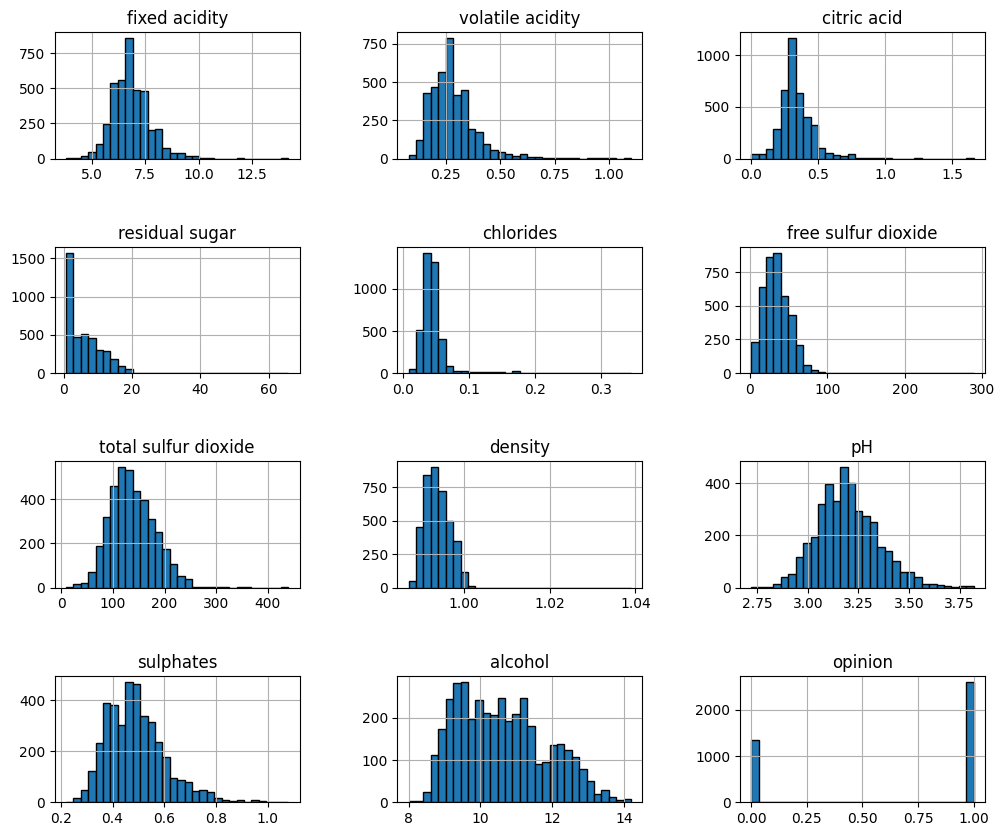

In [10]:
method.create_histogram(df_white_final)

Alguns dados se encontram desbalanceados, em seguida faremos algumas medidas de balanceamento, mas antes, vamos ver os outliers bom boxplot.

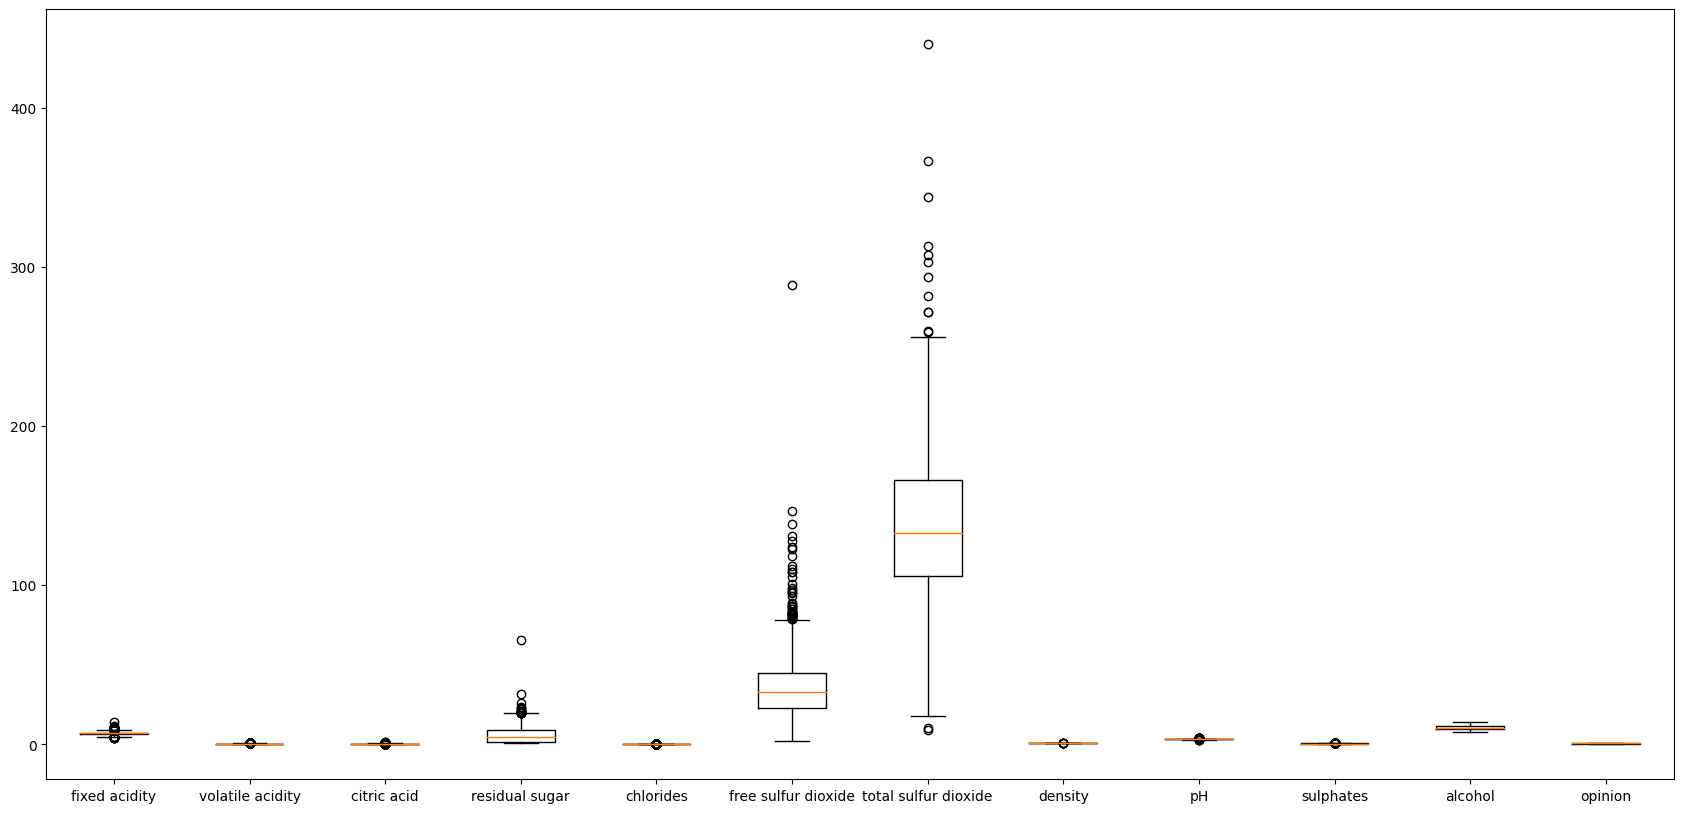

In [11]:
method.create_boxplot(df_white_final)

 - Em alguns países a legislação recomenda limites de 150mg/L a 250mg/L para dióxido de enxofre total (total sulfur dioxide), então usaremos esta limitação para filtração dos outliers.
 - O dióxido de enxofre livre (free sulfur dioxide) é recomendado estar na faixa de 5mg/L a 25mg/L, mas não é regra, portanto quando tratar outliers, será apenas os de valores muito discrepantes.
 - O açúcar residual (residual sugar) varia bastante dependendo do tipo de vinho (secos, meio-seco/meio-doce e doces), então na filtragem também será removido valores incomuns.

In [12]:
# removendo outliers
df_white_final = df_white_final[df_white_final['residual sugar'] <= 22.2]
df_white_final = df_white_final[df_white_final['total sulfur dioxide'] <= 255.5]
df_white_final = df_white_final[df_white_final['total sulfur dioxide'] >= 19.5]
df_white_final = df_white_final[df_white_final['free sulfur dioxide'] <= 150]

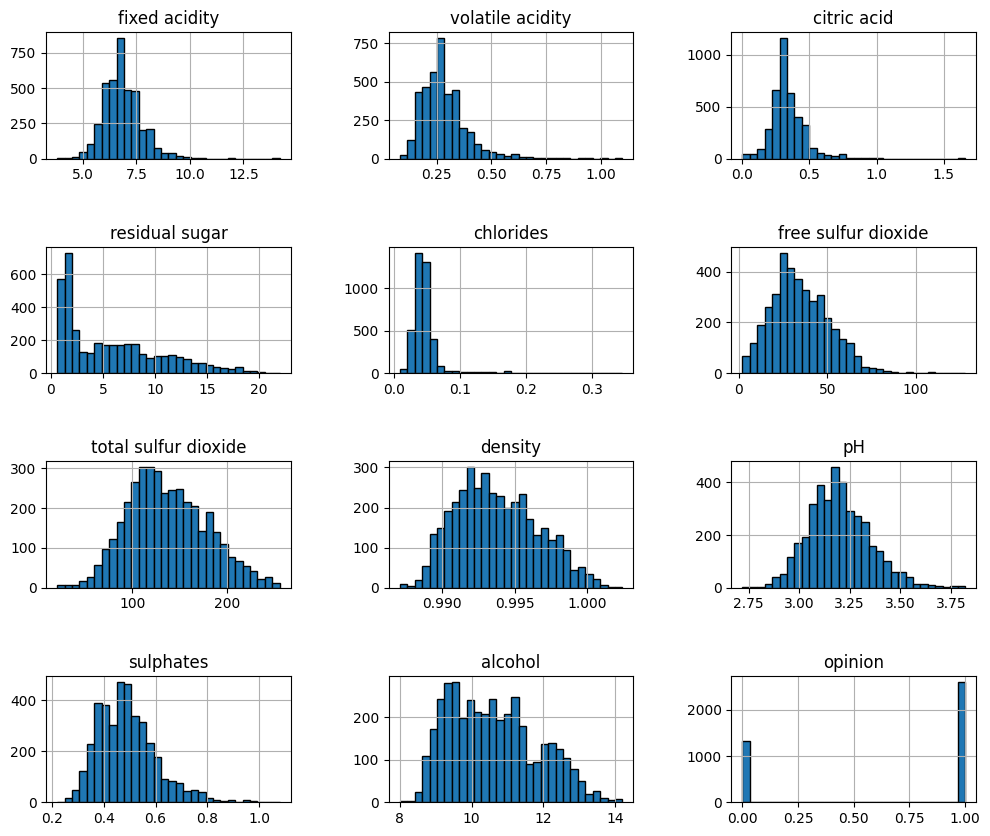

In [13]:
method.create_histogram(df_white_final)

Podemos notar uma normalizada nos gráficos

Com o uso de log, pretendo melhorar mais ainda essa distribuição

In [14]:
df_white_final['residual sugar'] = np.log(df_white_final['residual sugar'])
df_white_final['alcohol'] = np.log(df_white_final['alcohol'])
df_white_final['chlorides'] = np.log(df_white_final['chlorides'])

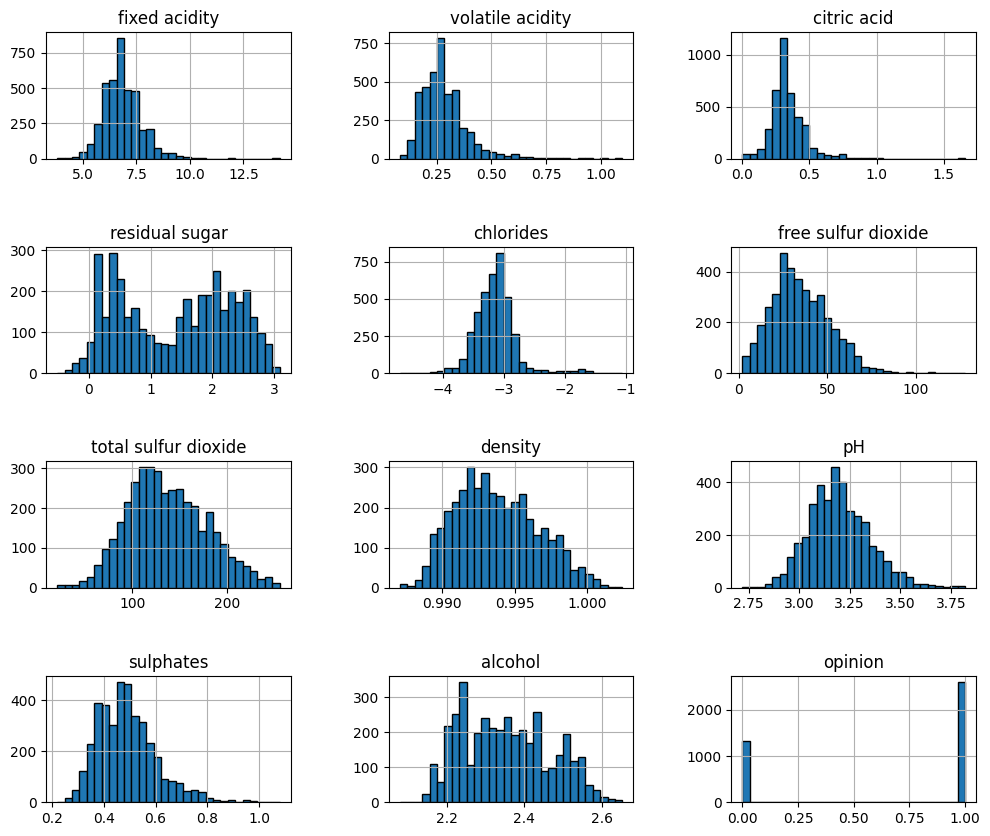

In [15]:
method.create_histogram(df_white_final)

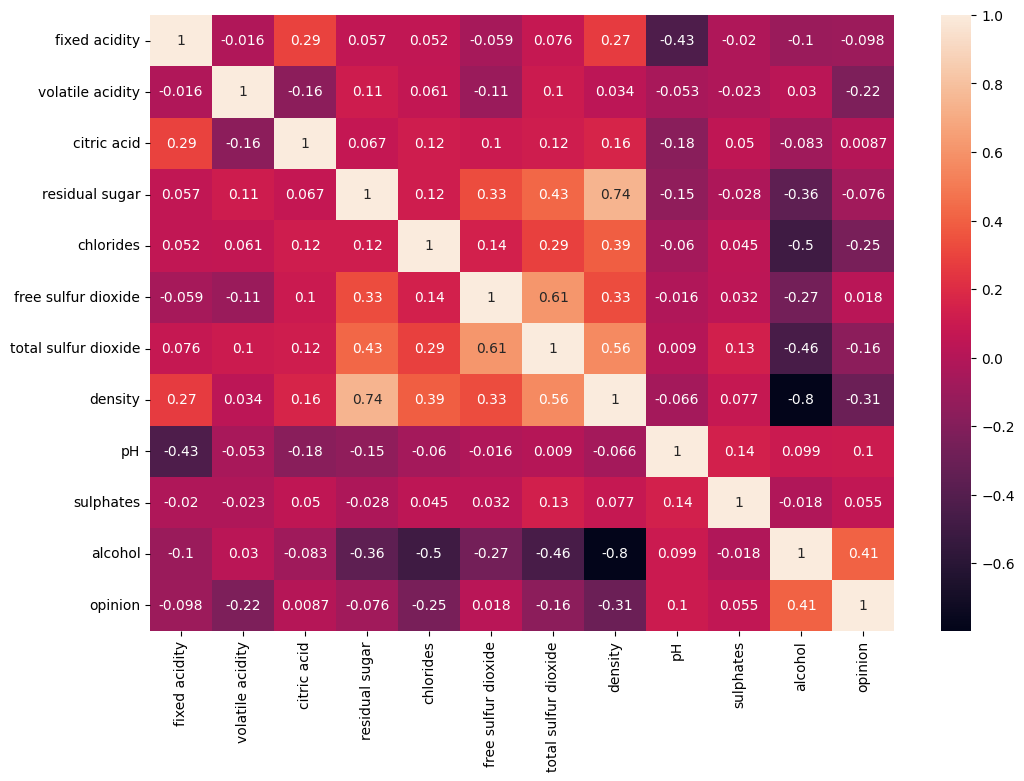

In [16]:
method.create_heatmap(df_white_final)

Não há correlações muito forte entre as colunas observadas, mas a que mais se destaca é density | residual sugar.


In [17]:
method.export_df(df_white_final, 'df_white_final')

'Arquivo salvo!'